<a href="https://colab.research.google.com/github/AryanXTH/AI-and-ML/blob/main/Workshop6_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network.
## Experimentation With Previous Week

## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
data_dir = "../Week5/FruitinAmazon/train"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    seed=123,
    validation_split=0.2,
    subset='training',
)

NotFoundError: Could not find directory ../Week5/FruitinAmazon/train

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=False,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
data_augmentation_layers = [
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
]
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [ ]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with the set of hyperparameters defined above.

    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.

    Output Args:
    model-> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer [For Keras the input shape must be (image height, image width, channels)]
        layers.Rescaling(
            1./255, input_shape=(image_height, image_width, nchannels)),
        layers.BatchNormalization()
        *data_augmentation_layers,

        # First Block of Convolution and Pooling Operations.
        # 32 filters, 3x3 kernel size, ReLU activation
        layers.Conv2D(32, (3, 3), activation='relu'),
        # Max pooling layer with 2x2 pool size
        layers.MaxPooling2D(pool_size=(2, 2)),
        # BatchNormalization(),

        # Second Block of Convolution and Pooling Operations.
        # 64 filters, 3x3 kernel size, ReLU activation
        layers.Conv2D(64, (3, 3), activation='relu'),
        # Max pooling layer with 2x2 pool size
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Third Block of Convolution and Pooling Operations (Optional, can be added for deeper model).
        # 128 filters, 3x3 kernel size, ReLU activation
        layers.Conv2D(128, (3, 3), activation='relu'),
        # Max pooling layer with 2x2 pool size
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected classifier.
        layers.Flatten(),  # Flatten the input to prepare for Dense layer

        # Fully connected layer with 128 units, ReLU activation
        layers.Dense(128, activation='relu'),


        # Output layer with units equal to the number of classes, Softmax for multi-class classification
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

C:\Users\apsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


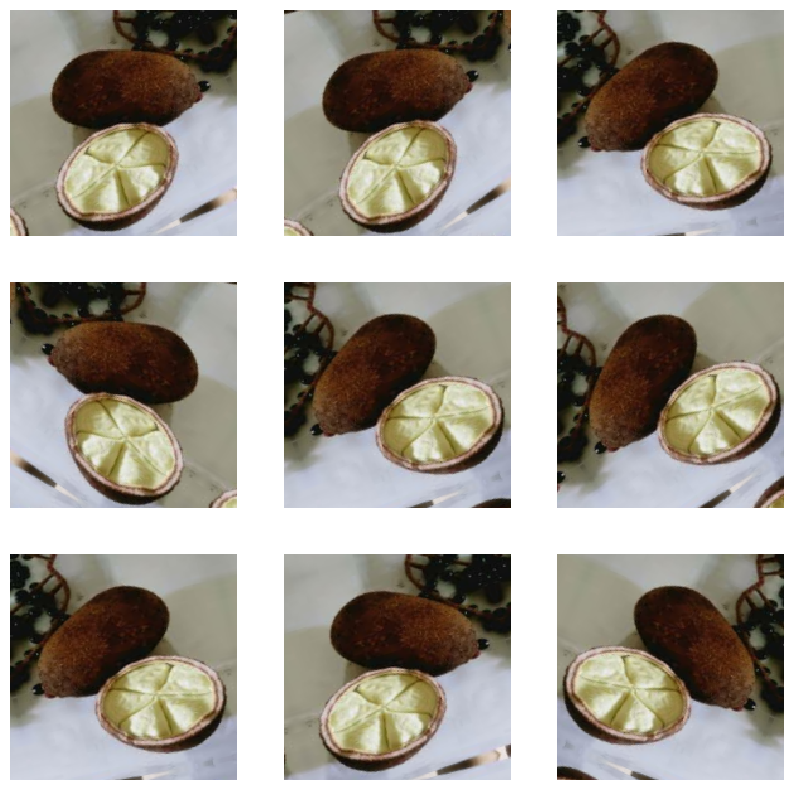

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_8 (RandomFlip)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_10              │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,750 (25.36 MB)

 Trainable params: 6,647,750 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.2708 - loss: 1.8120 - val_accuracy: 0.0556 - val_loss: 2.3381
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.3442 - loss: 1.6381 - val_accuracy: 0.3333 - val_loss: 1.4023
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - accuracy: 0.4831 - loss: 1.4602 - val_accuracy: 0.5000 - val_loss: 1.6904
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.4874 - loss: 1.2599 - val_accuracy: 0.8333 - val_loss: 0.9148
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.6641 - loss: 1.0666 - val_accuracy: 0.7222 - val_loss: 0.9212
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.7843 - loss: 0.8097 - val_accuracy: 0.3333 - val_loss: 1.3665
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.7365 - loss: 0.6763 - val_accuracy: 0.6667 - val_loss: 0.8118
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.7639 - loss: 0.6433 - val_accuracy: 0.7222 - val_loss:

## Observe the Model Performance.


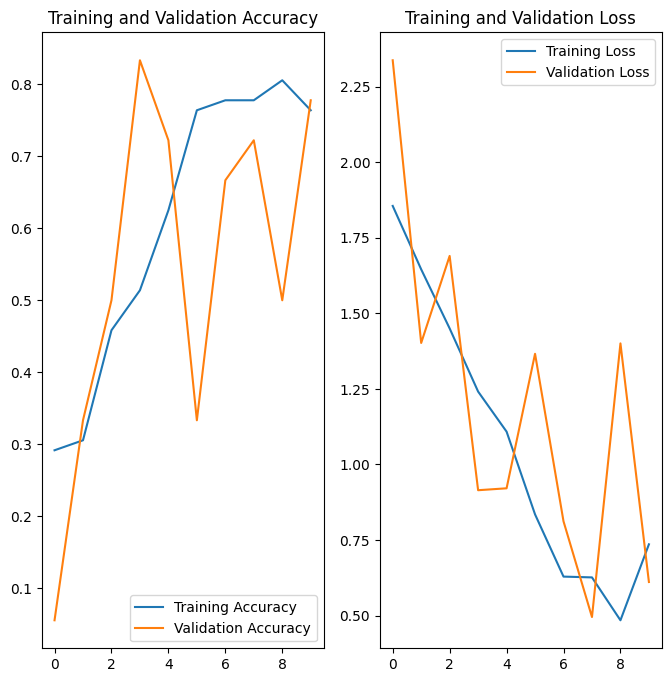

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "../Week5/FruitinAmazon/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',
    shuffle=True,
    seed=123,
)


Found 30 files belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

1/1 - 0s - 218ms/step - accuracy: 0.7667 - loss: 0.6216


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def predict_and_plot(model, test_ds, num_examples=5):
    class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else []
    test_images, test_labels = next(iter(test_ds))

    # To store the predictions and true labels for plotting results
    predicted_classes = []
    true_classes = []


    plt.figure(figsize=(15, 5))  # Adjust the figure size for better spacing

    # Randomly select some images from the test set
    for i in range(num_examples):
        img = test_images[i]
        label = test_labels[i]

        # Preprocess image for prediction
        img = tf.expand_dims(img, axis=0)

        # Make prediction
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        predicted_class_name = class_names[predicted_class]
        true_class_name = class_names[label.numpy()]

        # Store predictions and true labels for further analysis
        predicted_classes.append(predicted_class)
        true_classes.append(label.numpy())


        # Plot the image with prediction and true label
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(test_images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {predicted_class_name}\nTrue: {true_class_name}")
        plt.axis('off')

    # Plot the confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Plot the accuracy distribution or other result metrics (optional)
    plt.figure(figsize=(8, 6))
    accuracy = np.mean(np.array(true_classes) == np.array(predicted_classes))
    plt.bar(["Accuracy"], [accuracy], color="green")
    plt.ylim(0, 1)
    plt.title("Test Accuracy")
    plt.ylabel("Accuracy")
    plt.show()

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


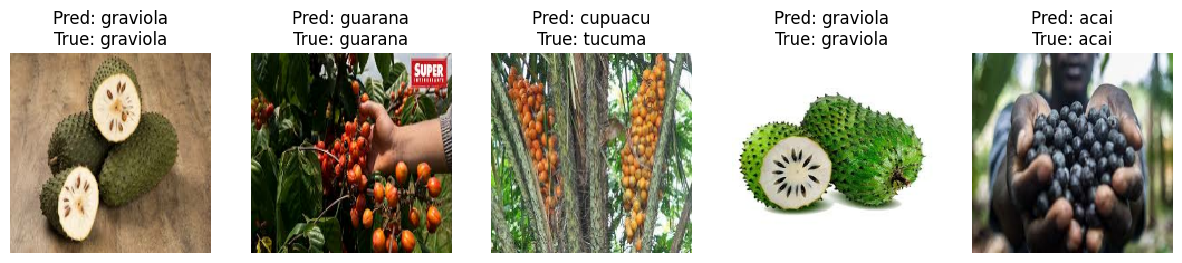

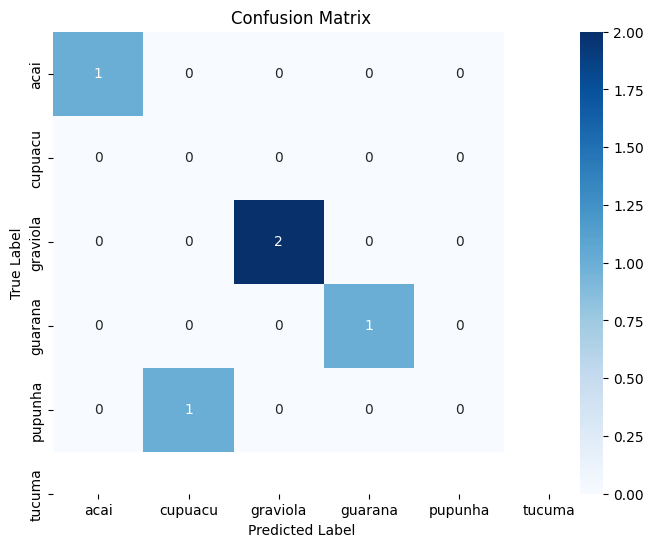

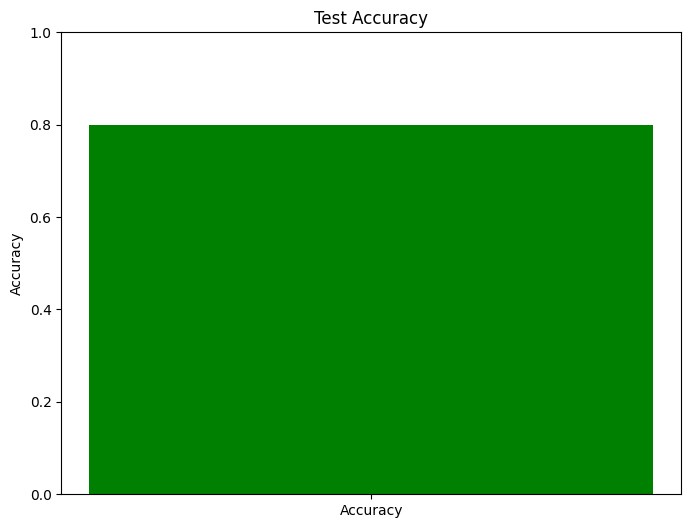

<Figure size 500x400 with 0 Axes>

In [ ]:
predict_and_plot(model, test_ds)